In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Merge genetic features with clinical features per repository

### Repository 1 - BRCA1/2-correlation

In [74]:
clinical_features_r1 = pd.read_csv('./../clinical_features/Repository1_clinical_features.csv')
genetic_features_r1 = pd.read_csv('./../models/model_logistic_regression_v4/manually_selected_features_frac.csv')
labels_v1 = pd.read_csv('./../labels/labels_v1/labels_v1.csv')


all_features_r1 = pd.merge(clinical_features_r1, genetic_features_r1, on='SAMPLE_ID', how='inner').merge(labels_v1, on='SAMPLE_ID', how='inner')
all_features_r1 = all_features_r1.set_index('SAMPLE_ID', inplace=False)


all_features_r1 = all_features_r1[all_features_r1['platinum-based_chemotherapy'] != 'use_as_blind_test']
print(list(all_features_r1))

BRCA_corr = all_features_r1[['labels_v1', 'family_history_of_cancer', 'BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'frac_sv_dup_30000+','frac_sv_del_100000+', 'frac_sv_dup_0_30000', 'frac_sv_del_0_100000']]
BRCA_corr

['Unnamed: 0_x', 'donor_age_at_diagnosis', 'primary_tumor', 'metastatic_tumor', 'platinum-based_chemotherapy', 'family_history_of_cancer', 'BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev', 'sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_del_mh_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'Interstitial_LOH', 'LST_count', 'LOH_count', 'MSI', 'cnv_DEL_0_3500_sum_indel_DEL_len_inf', 'indel_INS_len_inf_sum_cnv_DUP_0_30000', 'indel_INS_len_inf_sum_cnv_DUP_0_1000', 'frac_c

,labels_v1,family_history_of_cancer,BRCA1/2_mut,other_HRR_gene_mutation_somatic,ins_indel_ratio,del_indel_ratio,indel_DEL_mh,indel_DEL_noMHstatus,indel_DEL_rep,frac_sv_dup_30000+,frac_sv_del_100000+,frac_sv_dup_0_30000,frac_sv_del_0_100000
SAMPLE_ID,,,,,,,,,,,,,
Sample_0003,1,0,1,0,0.432000,0.568000,94,81,180,1.000000,0.596571,0.000000,0.403429
Sample_0004,1,0,0,1,0.126469,0.873531,821,191,252,0.205479,0.194024,0.794521,0.805976
Sample_0006,0,0,0,0,0.533487,0.466513,57,34,111,0.000000,0.402778,1.000000,0.597222
Sample_0009,1,0,1,0,0.290741,0.709259,394,145,227,0.443243,0.308341,0.556757,0.691659
Sample_0011,1,0,0,0,0.503928,0.496072,77,104,261,0.972125,0.546528,0.027875,0.453472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_0126,0,0,0,1,0.468085,0.531915,68,34,98,0.894737,0.357427,0.105263,0.642573
Sample_0128,1,0,0,0,0.541176,0.458824,87,61,242,0.707692,0.230106,0.292308,0.769894
Sample_0131,1,0,0,0,0.428571,0.571429,133,96,491,0.700000,0.546791,0.300000,0.453209


## Calculation of correlation matrix

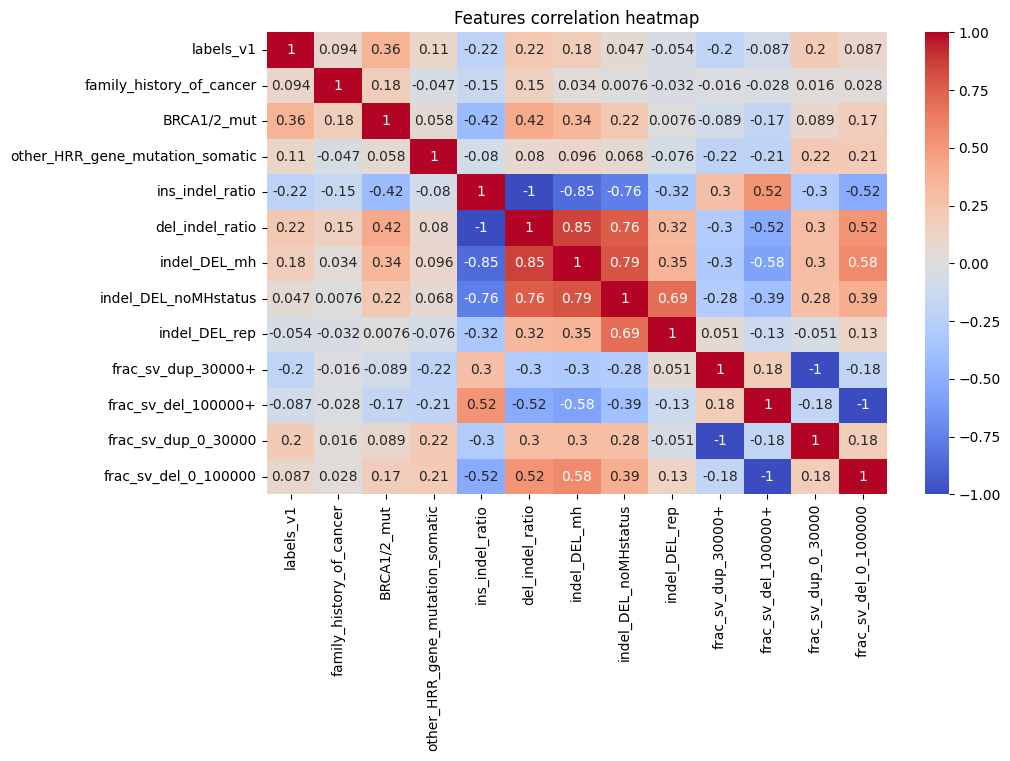

In [75]:
correlation_matrix = BRCA_corr.corr()

# Heatmap creation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.000001)
plt.title('Features correlation heatmap')
plt.show()


### Repository 2 - BRCA1/2-correlation

In [83]:
clinical_features_r2 = pd.read_csv('./../clinical_features/Repository2_clinical_features.csv')
genetic_features_r2 = pd.read_csv('./../models/model_logistic_regression_v4/manually_selected_features_frac.csv')
labels_v1 = pd.read_csv('./../labels/labels_v1/labels_v1.csv')

all_features_r2 = pd.merge(clinical_features_r2, genetic_features_r2, on='SAMPLE_ID', how='inner').merge(labels_v1, on='SAMPLE_ID', how='inner')
all_features_r2 = all_features_r2.set_index('SAMPLE_ID', inplace=False)


BRCA_corr_r2 = all_features_r2[['labels_v1','family_history_of_cancer', 'BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'frac_sv_dup_30000+','frac_sv_del_100000+', 'frac_sv_dup_0_30000', 'frac_sv_del_0_100000']]
BRCA_corr_r2

,labels_v1,family_history_of_cancer,BRCA1/2_mut,other_HRR_gene_mutation_somatic,ins_indel_ratio,del_indel_ratio,indel_DEL_mh,indel_DEL_noMHstatus,indel_DEL_rep,frac_sv_dup_30000+,frac_sv_del_100000+,frac_sv_dup_0_30000,frac_sv_del_0_100000
SAMPLE_ID,,,,,,,,,,,,,
Sample_0135,0,0,1,0,0.112311,0.887689,249,75,87,0.336735,0.341871,0.663265,0.658129
Sample_0136,0,0,0,0,0.467230,0.532770,109,49,94,0.434783,0.145936,0.565217,0.854064
Sample_0137,0,0,0,0,0.352500,0.647500,57,49,153,0.986842,0.638549,0.013158,0.361451
Sample_0138,1,1,1,0,0.112840,0.887160,468,104,112,0.230263,0.202508,0.769737,0.797492
Sample_0139,1,0,0,0,0.231047,0.768953,171,79,176,0.911765,0.444797,0.088235,0.555203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_0209,0,0,0,0,0.805536,0.194464,153,277,4523,0.888889,0.506604,0.111111,0.493396
Sample_0210,0,0,0,1,0.210736,0.789264,173,82,142,0.533333,0.265888,0.466667,0.734112
Sample_0211,0,0,0,0,0.372372,0.627628,57,57,95,0.987261,0.399117,0.012739,0.600883


## Calculation of correlation matrix

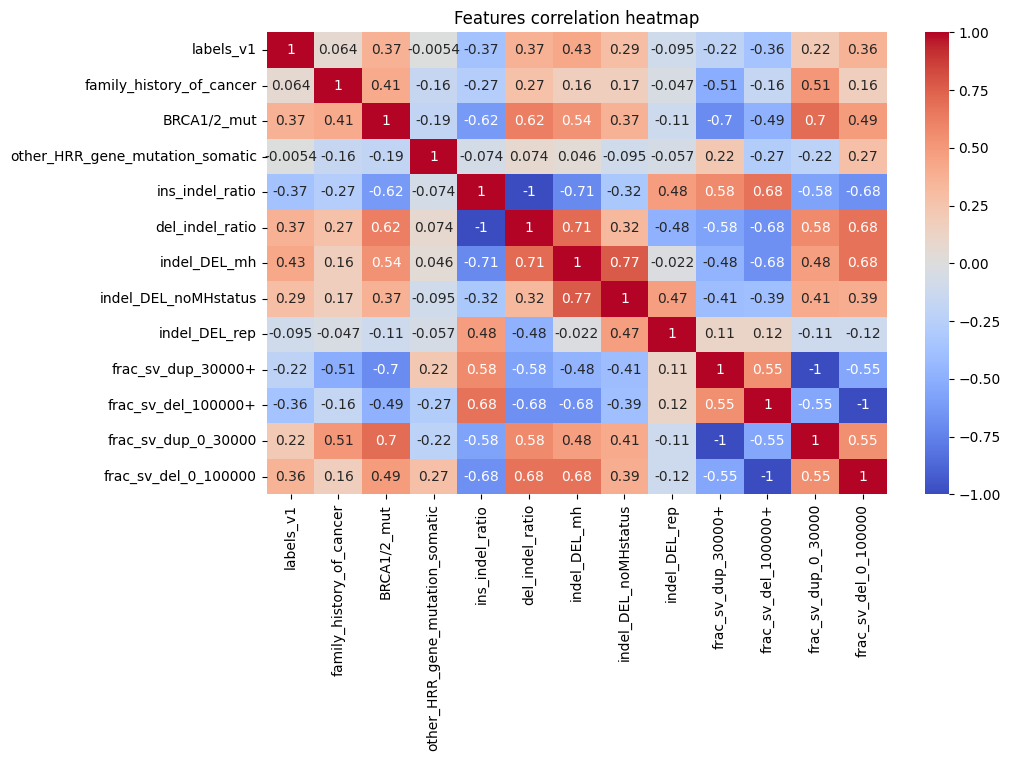

In [84]:
correlation_matrix = BRCA_corr_r2.corr()

# Heatmap creation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.000001)
plt.title('Features correlation heatmap')
plt.show()

### Repository 3 - BRCA1/2-correlation

In [87]:
clinical_features_r3 = pd.read_csv('./../clinical_features/Repository3_clinical_features.csv')
genetic_features_r3 = pd.read_csv('./../models/model_logistic_regression_v4/manually_selected_features_frac.csv')

all_features_r3 = pd.merge(clinical_features_r3, genetic_features_r3, on='SAMPLE_ID', how='inner').merge(labels_v1, on='SAMPLE_ID', how='inner')
all_features_r2 = all_features_r3.set_index('SAMPLE_ID', inplace=False)
all_features_r3 = all_features_r3.set_index('SAMPLE_ID', inplace=False)


BRCA_corr_r3 = all_features_r3[['labels_v1', 'family_history_of_cancer', 'BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'frac_sv_dup_30000+','frac_sv_del_100000+', 'frac_sv_dup_0_30000', 'frac_sv_del_0_100000']]
BRCA_corr_r3

,labels_v1,family_history_of_cancer,BRCA1/2_mut,other_HRR_gene_mutation_somatic,ins_indel_ratio,del_indel_ratio,indel_DEL_mh,indel_DEL_noMHstatus,indel_DEL_rep,frac_sv_dup_30000+,frac_sv_del_100000+,frac_sv_dup_0_30000,frac_sv_del_0_100000
SAMPLE_ID,,,,,,,,,,,,,
Sample_0214,1,0,1,0,0.119088,0.880912,691,148,204,0.807692,0.167141,0.192308,0.832859
Sample_0215,1,0,0,0,0.146667,0.853333,508,197,383,0.687500,0.223591,0.312500,0.776409
Sample_0216,1,0,0,1,0.287879,0.712121,113,39,83,0.833333,0.577932,0.166667,0.422068
Sample_0217,1,1,0,1,0.149035,0.850965,794,132,176,0.583333,0.106934,0.416667,0.893066
Sample_0218,1,0,0,0,0.259861,0.740139,120,69,130,0.941176,0.418129,0.058824,0.581871
Sample_0219,1,0,0,1,0.227222,0.772778,186,149,352,0.600000,0.264192,0.400000,0.735808
Sample_0220,1,0,1,0,0.148607,0.851393,384,91,75,0.070000,0.162527,0.930000,0.837473
Sample_0221,1,0,1,0,0.197080,0.802920,288,62,90,0.730769,0.255102,0.269231,0.744898
Sample_0222,1,1,1,1,0.118566,0.881434,1046,193,285,0.827586,0.120896,0.172414,0.879104


## Calculation of correlation matrix

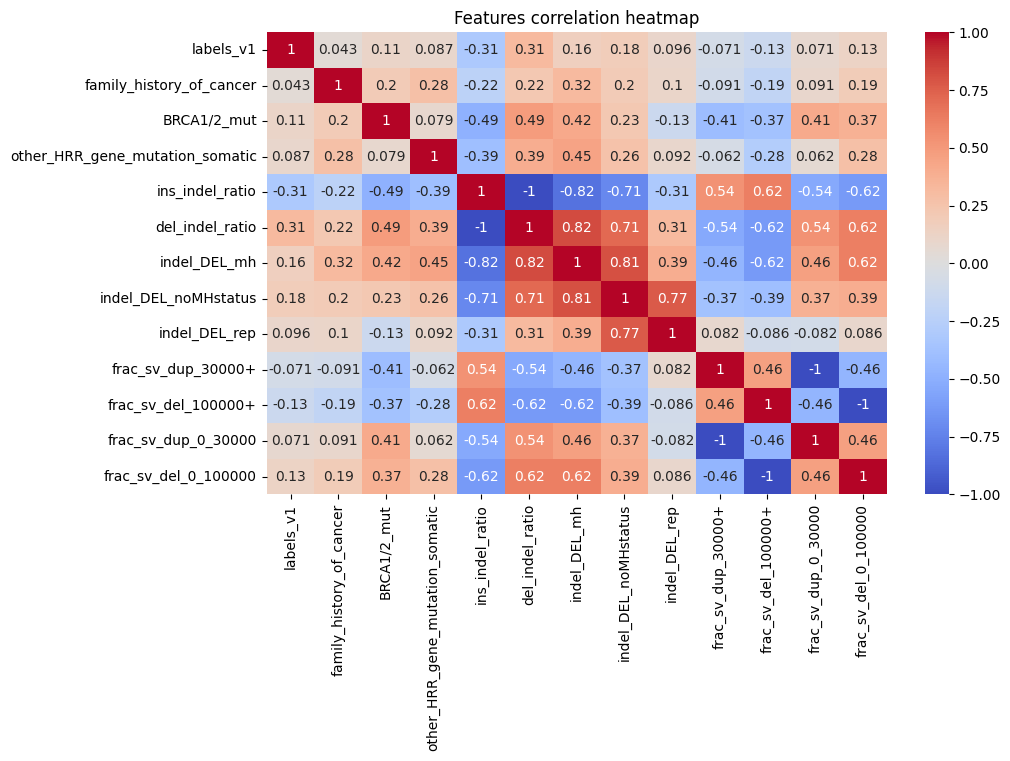

In [88]:
correlation_matrix = BRCA_corr_r3.corr()

# Heatmap creation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.000001)
plt.title('Features correlation heatmap')
plt.show()

### Repository 1 - platinum treatment-correlation

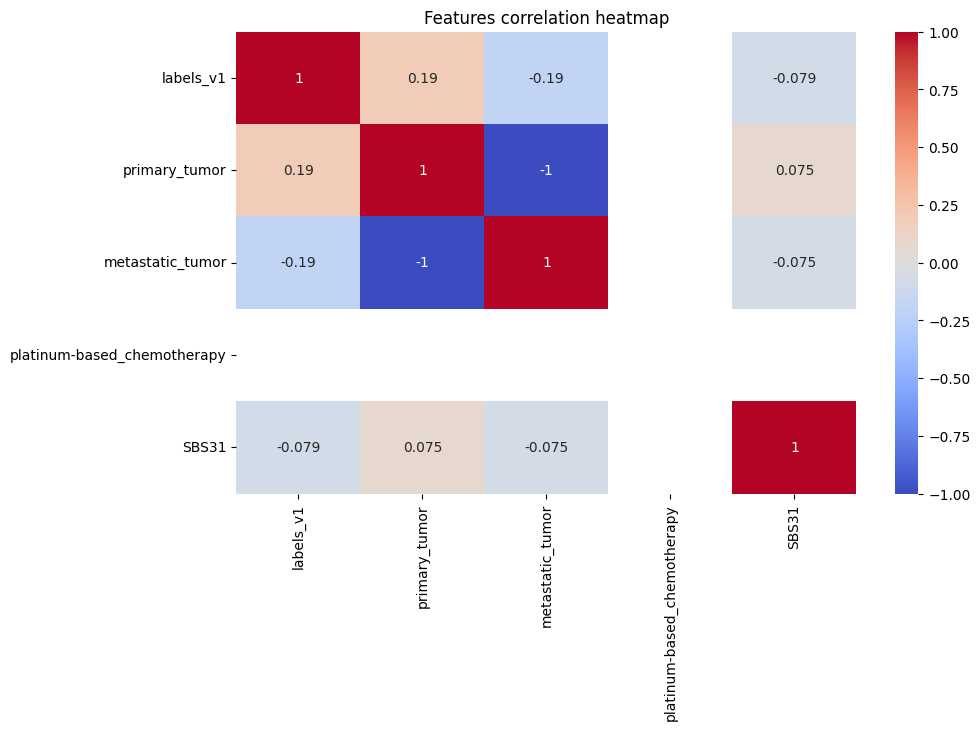

In [90]:
platinum_corr = all_features_r1[['labels_v1', 'primary_tumor', 'metastatic_tumor', 'platinum-based_chemotherapy', 'SBS31']]
platinum_corr

correlation_matrix = platinum_corr.corr()

# Heatmap creation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.000001)
plt.title('Features correlation heatmap')
plt.show()

## Repository 3 - platinum treatment-correlation

In [ ]:
platinum_corr_r3 = all_features_r3[['platinum-based_chemotherapy', 'SBS31']]
platinum_corr_r3

correlation_matrix = platinum_corr_r3.corr()

# Heatmap creation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.000001)
plt.title('Features correlation heatmap')
plt.show()